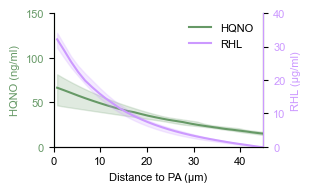

[info] Plotted fitted HQNO (left axis) and RHL (right axis) with percentile bands


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent / '0_plot_functions'))
from plot_publication_figures import plot_dual_axis_percentiles


# ——— figure style ———
final_width_cm = 8    # width in cm
final_height_cm = 5   # height in cm
final_width_in = final_width_cm / 2.54
final_height_in = final_height_cm / 2.54
font_size = 8  # points
plt.rcParams.update({
    'font.size': font_size,
    'font.family': 'Arial',
    'axes.labelsize': font_size,
    'axes.titlesize': font_size,
    'xtick.labelsize': font_size,
    'ytick.labelsize': font_size,
    'legend.fontsize': font_size,
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})

# HQNO color (green)
hqno_color = '#669966'

# RHL color (purple)
rhl_color = '#cc99ff'


# Choose x-axis (physical if available, otherwise y_bin)
x_col = 'y_um' 
x_label = "Distance to PA (µm)" 

# Fit column
fit_col = 'fit_y'

# Fit column
fit_col = 'fitted_concentration'


# Load both profiles 
HQNO_CSV = Path.cwd() / 'data' / '2_hqno_concentration_profiles.csv'
RHL_CSV = Path.cwd() / 'data' / '2_rhl_concentration_profiles.csv'

df_hqno = pd.read_csv(HQNO_CSV)
df_rhl = pd.read_csv(RHL_CSV)

# Function call replacing current plot
left_data = [{
    'df': df_hqno,
    'y_col': fit_col,
    'label': 'HQNO',
    'color': hqno_color,
    'ylabel': 'HQNO (ng/ml)',
    'ylim': (0, 150),
    'yticks': np.linspace(0, 150, 4)
}]

right_data = [{
    'df': df_rhl,
    'y_col': fit_col,
    'label': 'RHL',
    'color': rhl_color,
    'ylabel': 'RHL (µg/ml)',
    'ylim': (0, 40)
}]

x_config = {
    'xlabel': "Distance to PA (µm)",
    'xlim': (0, 45)
}

fig, ax = plot_dual_axis_percentiles(
    left_axis_data=left_data,
    right_axis_data=right_data,
    x_col='y_um',
    x_config=x_config,
    percentiles=[25, 50, 75],
    figsize=(final_width_in, final_height_in),
    font_size=font_size
)

# Save outputs
plt.savefig(f'./figures/3_hqno_rhl_dual_axis_{fit_col}.pdf', dpi=300, transparent=True)
plt.show()

print(f"[info] Plotted fitted HQNO (left axis) and RHL (right axis) with percentile bands")